## `Dataset`

### `Data Title`
- Malaysian Condominium Prices Data
- https://www.kaggle.com/datasets/mcpenguin/raw-malaysian-housing-prices-data

### `Dataset Description`
- This dataset captures 4K+ condominium unit listings on the Malaysian housing website mudah.my
- The goal is to predict houses prices given the different parameters
- This dataset is less clean than other datasets on Kaggle, as mentioned by the dataset owner, thus it needs a lot of work for cleaning it 

### `Feature Descriptions`
- description: The full (unfiltered) description for the unit listing.
- Ad List: The ID of the listing on the website.
- Category: The category of the listing. It will most likely be Apartment / Condominium.
- Facilities: The facilities that the apartment has, in a comma-separated list.
- Building Name: The name of the building.
- Developer: The developer for the building.
- Tenure Type: The type of tenure for the building.
- Address: The address of the building. You can refer to this link (https://ling-app.com/ms/malay-addresses/#:~:text=Generally%2C%20a%20Malaysian%20address%20is,line%201%20and%20line%202.) for a description of what Malaysian addresses look like.
- Completion Year: The completion year of the building. If the building is still under construction, this is listed as -.
- #of Floors: The number of floors in the building.
- Total Units: The total number of units in the building.
- Property Type: The type of property.
- Bedroom: The number of bedrooms in the unit.
- Bathroom: The number of bathrooms in the unit.
- Parking Lot: The number of parking lots assigned to the unit, if any.
- Floor Range: The floor range for the building.
- Property Size: The size of the unit.
- Land Title: The title given to the land. This link (https://properly.com.my/blog/a-guide-on-land-titles/) explains what land titles are.
- Firm Type: The type of firm who posted the listing.
- Firm Number: The ID of the firm who posted the listing.
- REN Number: The REN number of the firm who posted the listing. Refer to this link (https://www.propertyguru.com.my/property-guides/how-to-check-ren-rea-number-property-agent-32516) for what REN numbers are.
- price: The price of the unit. This is what you are trying to predict.
- Nearby School/School: If there is a nearby school to the unit, which school it is.
- Park: If there is a nearby park to the unit, which park it is.
- Nearby Railway Station: If there is a nearby railway station to the unit, which railway station it is.
- Bus Stop: If there is a nearby bus stop to the unit, which station it is.
- Nearby Mall/Mall: If there is a nearby mall to the unit, which mall it is.
- Highway: If there is a nearby highway to the unit, which highway it is.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from datasist.structdata import detect_outliers
from category_encoders.binary import BinaryEncoder
 
## other
#from imblearn.over_sampling import SMOTE

## sklearn -- preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate, GridSearchCV
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest, mutual_info_regression

## sklearn -- models
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor

## skelarn -- metrics
from sklearn.metrics import f1_score, accuracy_score, r2_score, mean_squared_error, mean_absolute_error

## ensemble models
from sklearn.ensemble import VotingRegressor,  AdaBoostRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor

from sklearn.decomposition import PCA

import re

### `Read Dataset`

In [5]:
# read dataset
df = pd.read_csv("houses.csv", na_values=['Unknown', '', 'na', 'nan', 'NA', 'NAN', '-' ])

# all columns except 'description'
for col in df.columns:
    if col not in ['Address', 'price']:
        df.drop([col], axis=1, inplace=True)

df.head(3)

,Address,price
0,"Jalan Gombak, Setapak, Kuala Lumpur",RM 340 000
1,"Jalan Kenanga 3/8, Melaka City, Melaka",RM 250 000
2,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",RM 230 000


In [3]:
df.shape

(4000, 30)

### `Check the datatypes of the columns`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  3913 non-null   object
 1   price    4000 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


## `Data Cleaning`

### `Check duplicates and drop them`

In [7]:
df.duplicated().sum()

645

In [8]:
# drop duplicates
df.drop_duplicates(inplace= True)
df.reset_index(inplace= True, drop= True)
df.duplicated().sum()

0

### `Remove the currency 'RM' (Malaysian Ringgit) from price column`

In [9]:
# convert price to float
def fix_price(value:str):
    if isinstance(value, float):
        return value
    else:
        modified_value = value.replace(' ', '').replace('RM', '')
        return float(modified_value) 

df['price'] = df['price'].apply(fix_price) 
df['price'].describe()

count    3.355000e+03
mean     4.238752e+05
std      3.411032e+05
min      3.800000e+04
25%      2.500000e+05
50%      3.500000e+05
75%      4.915000e+05
max      6.016000e+06
Name: price, dtype: float64

## `Feature Engineering`

### `Extract informaton from Address`

In [10]:


# # extract city, state from address
# result = df['description'].apply(lambda x :  np.array(re.findall(r'\b\w+\b', x)) if isinstance(x, str) else np.array(1)  )
# unique_words = {}

# def increment_unique_words(x):
#     if x in unique_words:
#         unique_words[x]+=1
#     else:
#         unique_words[x] = 1 
 

# #[unique_words.add(x) for x in result[0]]
# result.apply(lambda lst : [ increment_unique_words(x) for x in lst] if isinstance(lst, np.ndarray) else 'test'  )



# sorted_unique_words = sorted(unique_words.items(), key=lambda x:x[1], reverse=True)
# print(sorted_unique_words)
 


[('contact', 7276), ('2', 6052), ('Show', 5997), ('number', 5985), ('3', 4857), ('to', 4120), ('1', 3547), ('and', 2762), ('Reading', 2641), ('Continue', 2620), ('for', 2535), ('more', 2232), ('Nearby', 2125), ('For', 1910), ('Property', 1869), ('ft', 1774), ('Bathroom', 1736), ('6', 1728), ('with', 1635), ('Size', 1609), ('Bedroom', 1608), ('PROPERTY', 1462), ('me', 1432), ('sq', 1420), ('details', 1406), ('000', 1340), ('School', 1329), ('Mall', 1258), ('Station', 1221), ('Freehold', 1204), ('NEW', 1155), ('See', 1135), ('Price', 1127), ('HIGHLIGHTS', 1124), ('RM', 1124), ('unit', 1100), ('the', 1095), ('Highway', 1095), ('https', 1070), ('FOR', 1055), ('in', 1028), ('my', 972), ('Apartment', 971), ('Unit', 946), ('4', 935), ('sqft', 929), ('SALE', 899), ('Loan', 873), ('Fully', 860), ('viewing', 856), ('Call', 855), ('is', 849), ('Bathrooms', 837), ('Bedrooms', 830), ('Taman', 827), ('5', 803), ('Bumi', 794), ('of', 789), ('Renovated', 764), ('only', 762), ('Sale', 760), ('Contact',

In [10]:
def split_address_into_separate_columns(df):
    for index in df.index:
        address = df.loc[index, 'Address']
        
        if type(address) == str:
    
            parts = np.array(re.findall(r'\b\w+\b', address))

            # loop on each address 
            for part in parts: 
                part = '_' + part

                if part not in df.columns:
                    # initialize new column with value Zero
                    df.loc[:, part] = 0
                    
                # indicate that the current row has this word
                df.loc[index, part] += 1 
    return df

#split_address_into_separate_columns(df)
df = split_address_into_separate_columns(df)


C:\Users\eahme\AppData\Local\Temp\ipykernel_8804\1168844012.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, part] = 0
C:\Users\eahme\AppData\Local\Temp\ipykernel_8804\1168844012.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, part] = 0
C:\Users\eahme\AppData\Local\Temp\ipykernel_8804\1168844012.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

In [24]:
df.shape

(3757, 22398)

In [13]:
df.drop(['Address'], axis=1, inplace=True)

KeyError: "['address'] not found in axis"

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3355 entries, 0 to 3354
Columns: 1619 entries, price to _Berang
dtypes: float64(1), int64(1618)
memory usage: 41.4 MB


## `Visualization`

### `Check the distribution of Price column`

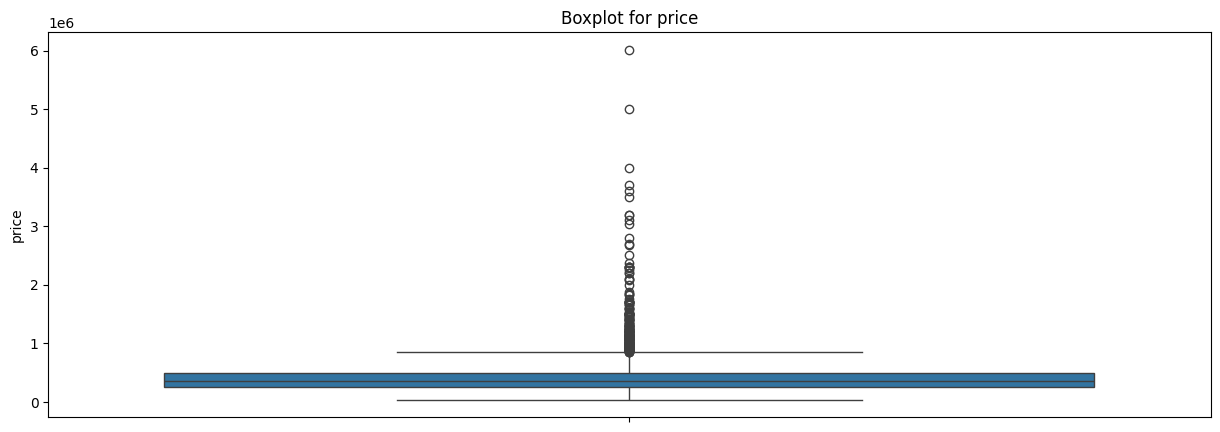

In [15]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, y='price')
plt.title('Boxplot for price')
plt.show()

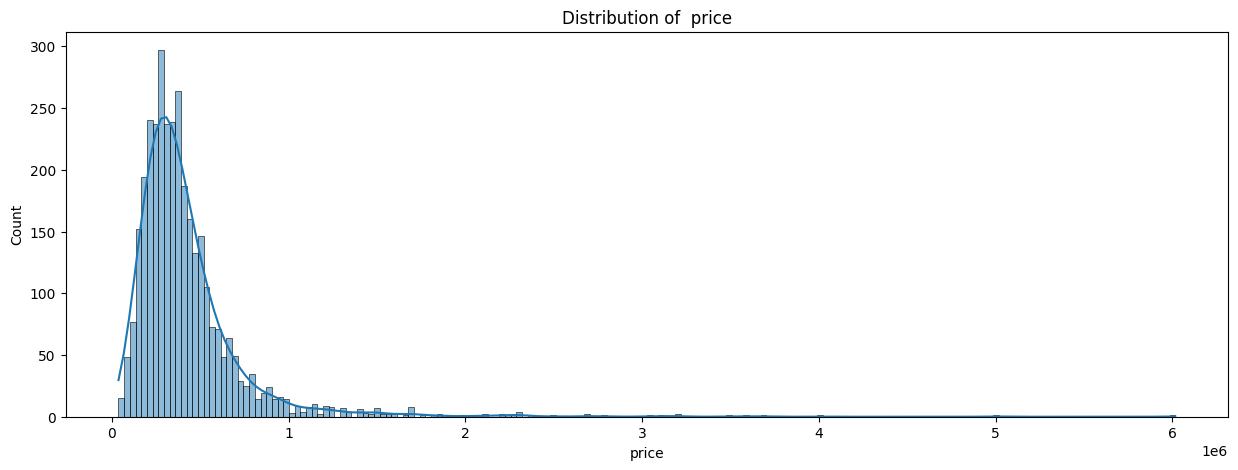

In [16]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='price', kde=True)
plt.title('Distribution of  price')
plt.show()

### `Check the distribution of log(Price) column`

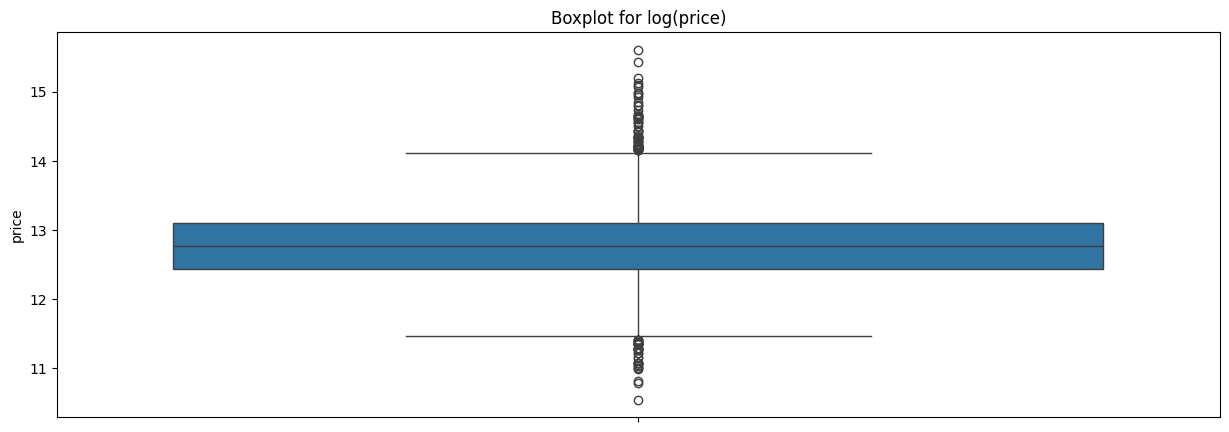

In [17]:
# take log of the price 
df['price'] = np.log(df['price'])

plt.figure(figsize=(15,5))
sns.boxplot(data=df, y='price')
plt.title('Boxplot for log(price)')
plt.show()
 

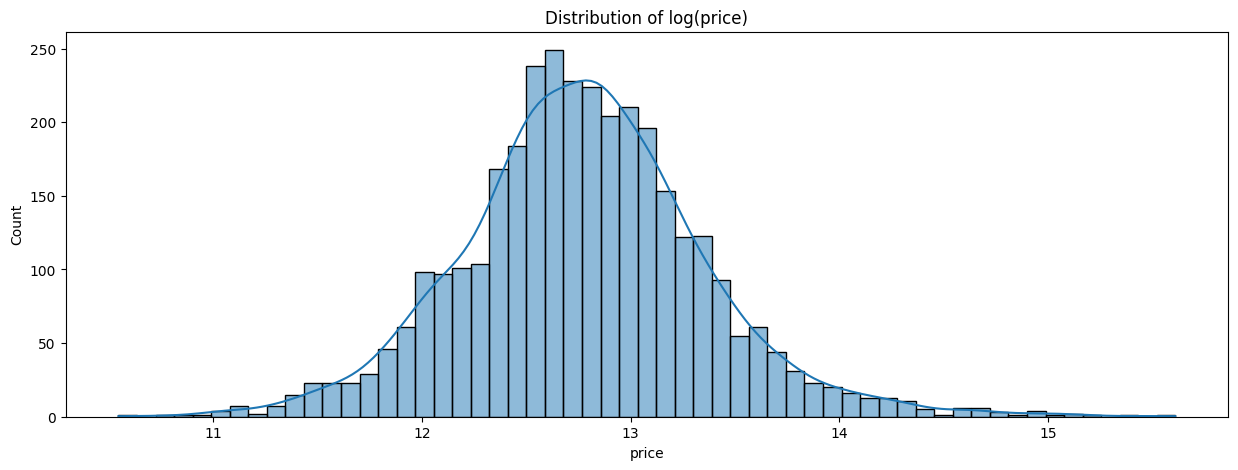

In [18]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='price', kde=True)
plt.title('Distribution of log(price)')
plt.show()

#### We can notice that the following:
- Taking log of the price changed its distribution to normal distribution

## `Preprocessing`

### `Split Data into train and validation datasets`

In [61]:
#df= df.rename(str,axis="columns") 

In [19]:

# split the dataset
## Features and target
X = df.drop(columns=['price'], axis=1)
y = df['price']

## to full train and test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=50)

print('X_train shape', X_train.shape)
print('X_valid shape', X_valid.shape)
print('y_train shape', y_train.shape)
print('y_valid shape', y_valid.shape)

X_train shape (2684, 1618)
X_valid shape (671, 1618)
y_train shape (2684,)
y_valid shape (671,)


### `Principal component analysis`

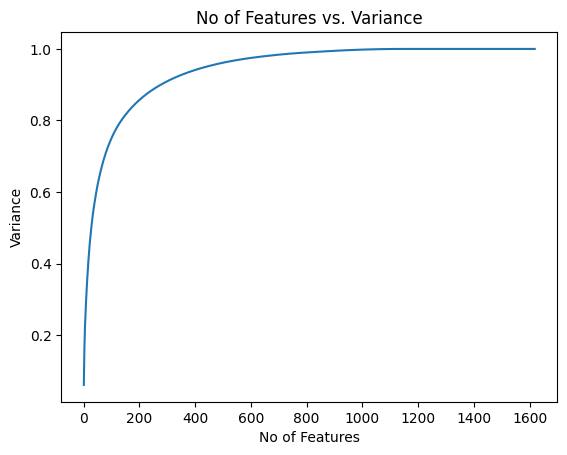

In [20]:
_pca = PCA(n_components=None)
_pca.fit(X_train)

## Let's get the cumsum of the explained var ratio
cumsum_pca = np.cumsum(_pca.explained_variance_ratio_)

## plotting
plt.plot(range(1, len(cumsum_pca) + 1), cumsum_pca)
plt.title('No of Features vs. Variance')
plt.xlabel('No of Features')
plt.ylabel('Variance')
plt.show()

In [21]:
_pca = PCA(n_components=None)
_pca.fit(X_train)
X_train_PCA = _pca.transform(X_train)
X_valid_PCA = _pca.transform(X_valid)

In [22]:
len(_pca.explained_variance_ratio_)

1618

In [23]:
sum(_pca.explained_variance_ratio_)

0.9999999999999999

#### `Data Preprocessing`

In [96]:
X_train_PCA = pd.DataFrame(X_train_PCA)
X_valid_PCA = pd.DataFrame(X_valid_PCA)

In [24]:
X_train_PCA = X_train
X_valid_PCA = X_valid

In [25]:
#preprocessing
## Slice cols
float_cols = X_train_PCA.select_dtypes(include=['number']).columns.tolist()
 
len(float_cols)


1618

In [144]:
## Pipeline 

## Int --> Impute using mode, Standardization
## float --> Impute using median, Standardization
## bool --> Impute using mode, Ordinal
## Categorical --> Impute using mode, Ordinal


In [31]:
 

## Float
float_pipline = Pipeline(steps=[
                ('selector', DataFrameSelector(float_cols)),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler())
            ])

all_pipeline = Pipeline(steps=[('pipeline', float_pipline), 
                               ('FeatureSelection', SelectKBest(mutual_info_regression, k= int(1 * X_train_PCA.shape[1]))) ])

## apply
X_train_final  = all_pipeline.fit_transform(X_train_PCA, y_train)
X_valid_final = all_pipeline.transform(X_valid_PCA)


 

In [32]:
## Check shapes

print('X_train_final.shape \t', X_train_final.shape)
print('y_train_encoded.shape \t', y_train.shape)
print('**'*20)
print('X_valid_final.shape \t', X_valid_final.shape)
print('y_valid_encoded.shape \t', y_valid.shape)  ## fine

X_train_final.shape 	 (2684, 1618)
y_train_encoded.shape 	 (2684,)
****************************************
X_valid_final.shape 	 (671, 1618)
y_valid_encoded.shape 	 (671,)


## `Building Models`

`Let's consider evaluation metric f1_score `

In [33]:
y_train_exp = np.exp(y_train)
y_valid_exp = np.exp(y_valid)

#### 1. Linear Regression

In [34]:
## Model Training
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)

## Predict and evaluate 
y_pred_train_lin = lin_reg.predict(X_train_final)
y_pred_valid_lin = lin_reg.predict(X_valid_final)

## take exp(y)
y_pred_train_lin = np.exp(y_pred_train_lin)
y_pred_valid_lin = np.exp(y_pred_valid_lin)

## Evaluate
score_train_lin = r2_score(y_train_exp, y_pred_train_lin)
score_valid_lin = r2_score(y_valid_exp, y_pred_valid_lin)

print(f'R2 Score for Training Dataset using LinearRegression {score_train_lin * 100 :.3f}')
print(f'R2 Score for Valid Dataset using LinearRegression {score_valid_lin * 100 :.3f}')

mse_train_lin = mean_absolute_error(y_train_exp, y_pred_train_lin)
mse_valid_lin = mean_absolute_error(y_valid_exp, y_pred_valid_lin)

print(f'MAE for Training Dataset using LinearRegression {mse_train_lin :.3f}')
print(f'MAE for Valid Dataset using LinearRegression {mse_valid_lin :.3f}')

C:\Users\eahme\AppData\Local\Temp\ipykernel_8804\2419644149.py:11: RuntimeWarning: overflow encountered in exp
  y_pred_valid_lin = np.exp(y_pred_valid_lin)


ValueError: Input contains infinity or a value too large for dtype('float64').

In [180]:
np.isclose(y_train, y_pred_train_lin)

array([False, False, False, ..., False, False, False])

#### 2. Polynomail Features

In [66]:
# # Initialize Polynomial Features
# poly = PolynomialFeatures(degree=, include_bias=True)

# # Polynomial fitting and transforming
# X_train_final2 = poly.fit_transform(X_train_final)
# X_valid_final2 = poly.transform(X_valid_final)


# ## Model Training
# lin_poly_reg = LinearRegression()
# lin_poly_reg.fit(X_train_final2, y_train)

# ## Predict and evaluate 
# y_pred_train_lin_poly = lin_poly_reg.predict(X_train_final2)
# y_pred_valid_lin_poly = lin_poly_reg.predict(X_valid_final2)

# ## take exp(y)
# y_pred_train_lin_poly = np.exp(y_pred_train_lin_poly)
# y_pred_valid_lin_poly = np.exp(y_pred_valid_lin_poly)

# ## Evaluate
# score_train_lin_poly = r2_score(y_train_exp, y_pred_train_lin_poly)
# score_valid_lin_poly = r2_score(y_valid_exp, y_pred_valid_lin_poly)

# print(f'R2 Score for Training Dataset using LinearRegression with PolynomialFeatures {score_train_lin_poly * 100 :.3f}')
# print(f'R2 Score for Valid Dataset using LinearRegression with PolynomialFeatures {score_valid_lin_poly * 100 :.3f}')


# mse_train_lin_poly = mean_absolute_error(y_train_exp, y_pred_train_lin_poly)
# mse_valid_lin_poly = mean_absolute_error(y_valid_exp, y_pred_valid_lin_poly)

# print(f'MAE for Training Dataset using LinearRegression with PolynomialFeatures  {mse_train_lin_poly :.3f}')
# print(f'MAE for Valid Dataset using LinearRegression with PolynomialFeatures  {mse_valid_lin_poly :.3f}')

R2 Score for Training Dataset using LinearRegression with PolynomialFeatures 89.992
R2 Score for Valid Dataset using LinearRegression with PolynomialFeatures 22.803
MAE for Training Dataset using LinearRegression with PolynomialFeatures  47426.595
MAE for Valid Dataset using LinearRegression with PolynomialFeatures  144054.471


#### 3. Random Forest

In [35]:
## Model Training
forst_reg = RandomForestRegressor(n_estimators=150, max_depth=5, max_features=0.9, random_state=45)
forst_reg.fit(X_train_final, y_train)

## Predict and evaluate 
y_pred_train_forest = forst_reg.predict(X_train_final)
y_pred_valid_forest = forst_reg.predict(X_valid_final)

## take exp(y)
y_pred_train_forest = np.exp(y_pred_train_forest)
y_pred_valid_forest = np.exp(y_pred_valid_forest)

## Evaluate
score_train_forest = r2_score(y_train_exp, y_pred_train_forest)
score_valid_forest = r2_score(y_valid_exp, y_pred_valid_forest)

print(f'R2 Score for Training Dataset using RF {score_train_forest * 100 :.3f}')
print(f'R2 Score for Valid Dataset using RF {score_valid_forest * 100 :.3f}')

mse_train_forest = mean_absolute_error(y_train_exp, y_pred_train_forest)
mse_valid_forest = mean_absolute_error(y_valid_exp, y_pred_valid_forest)

print(f'MAE for Training Dataset using RF  {mse_train_forest :.3f}')
print(f'MAE for Valid Dataset using RF  {mse_valid_forest :.3f}')

R2 Score for Training Dataset using RF 18.940
R2 Score for Valid Dataset using RF 14.382
MAE for Training Dataset using RF  160206.854
MAE for Valid Dataset using RF  160946.841


#### 4. KNN

In [117]:
## Model Training
knn_reg = KNeighborsRegressor(n_neighbors=5, p=1, n_jobs=-1)
knn_reg.fit(X_train_final, y_train)

## Predict and evaluate 
y_pred_train_knn = knn_reg.predict(X_train_final)
y_pred_valid_knn = knn_reg.predict(X_valid_final)

## take exp(y)
y_pred_train_knn = np.exp(y_pred_train_knn)
y_pred_valid_knn = np.exp(y_pred_valid_knn)

## Evaluate
score_train_knn = r2_score(y_train_exp, y_pred_train_knn)
score_valid_knn = r2_score(y_valid_exp, y_pred_valid_knn)

print(f'R2 Score for Training Dataset using knn {score_train_knn * 100 :.3f}')
print(f'R2 Score for Valid Dataset using knn {score_valid_knn * 100 :.3f}')

mse_train_knn = mean_absolute_error(y_train_exp, y_pred_train_knn)
mse_valid_knn = mean_absolute_error(y_valid_exp, y_pred_valid_knn)

print(f'MAE for Training Dataset using knn  {mse_train_knn :.3f}')
print(f'MAE for Valid Dataset using knn  {mse_valid_knn :.3f}')

R2 Score for Training Dataset using knn 36.542
R2 Score for Valid Dataset using knn 12.045
MAE for Training Dataset using knn  124656.177
MAE for Valid Dataset using knn  145108.535


#### 5. SGD with Early Stopping

In [118]:
## Model Training
SGD_reg = SGDRegressor(penalty=None, learning_rate='constant', eta0=0.001, early_stopping=True, 
                       n_iter_no_change=100, validation_fraction=0.1, max_iter=5000)
SGD_reg.fit(X_train_final, y_train)

## Predict and evaluate 
y_pred_train_SGD = SGD_reg.predict(X_train_final)
y_pred_valid_SGD = SGD_reg.predict(X_valid_final)

## take exp(y)
y_pred_train_SGD = np.exp(y_pred_train_SGD)
y_pred_valid_SGD = np.exp(y_pred_valid_SGD)

## Evaluate
score_train_SGD = r2_score(y_train_exp, y_pred_train_SGD)
score_valid_SGD = r2_score(y_valid_exp, y_pred_valid_SGD)

print(f'R2 Score for Training Dataset using SGDRegressor {score_train_SGD * 100 :.3f}')
print(f'R2 Score for Valid Dataset using SGDRegressor {score_valid_SGD * 100 :.3f}')

mse_train_SGD = mean_absolute_error(y_train_exp, y_pred_train_SGD)
mse_valid_SGD = mean_absolute_error(y_valid_exp, y_pred_valid_SGD)

print(f'MAE for Training Dataset using SGDRegressor  {mse_train_SGD :.3f}')
print(f'MAE for Valid Dataset using SGDRegressor  {mse_valid_SGD :.3f}')

R2 Score for Training Dataset using SGDRegressor 66.555
R2 Score for Valid Dataset using SGDRegressor 9.647
MAE for Training Dataset using SGDRegressor  95149.569
MAE for Valid Dataset using SGDRegressor  154586.227


#### 6. Ensemble Learning: Voting

In [191]:
## Voting for (LinearRegression, RandomForest, KNeighbors, SGDRegressor) 
voting_reg = VotingRegressor(estimators=[
                                    ('lin_reg', lin_reg),
                                    ('forst_reg', forst_reg),
                                    ('knn_reg ', knn_reg ),
                                    ('SGD_reg', SGD_reg)
                                        ])


voting_reg.fit(X_train_final, y_train) 

## Predict and evaluate 
y_pred_train_voting = voting_reg.predict(X_train_final)
y_pred_valid_voting = voting_reg.predict(X_valid_final)


## take exp(y)
y_pred_train_voting = np.exp(y_pred_train_voting)
y_pred_valid_voting = np.exp(y_pred_valid_voting)

## Evaluate
score_train_voting = r2_score(y_train_exp, y_pred_train_voting)
score_valid_voting = r2_score(y_valid_exp, y_pred_valid_voting)

print(f'R2 Score for Training Dataset using voting {score_train_voting * 100 :.3f}')
print(f'R2 Score for Valid Dataset using voting {score_valid_voting * 100 :.3f}')

mse_train_voting = mean_absolute_error(y_train_exp, y_pred_train_voting)
mse_valid_voting = mean_absolute_error(y_valid_exp, y_pred_valid_voting)

print(f'MAE for Training Dataset using voting  {mse_train_voting :.3f}')
print(f'MAE for Valid Dataset using voting  {mse_valid_voting :.3f}')

R2 Score for Training Dataset using voting 67.161
R2 Score for Valid Dataset using voting 54.151
MAE for Training Dataset using voting  84713.550
MAE for Valid Dataset using voting  94420.325


#### 7. Ensemble Learning: Bagging -> RandomForest

In [71]:
## Model Training
forst_reg = RandomForestRegressor(n_estimators=150, max_depth=5, max_features=0.8, random_state=45,
                                    max_samples=0.8, bootstrap=True, oob_score=True)
forst_reg.fit(X_train_final, y_train)

## Predict and evaluate 
y_pred_train_forest = forst_reg.predict(X_train_final)
y_pred_valid_forest = forst_reg.predict(X_valid_final)

## take exp(y)
y_pred_train_forest = np.exp(y_pred_train_forest)
y_pred_valid_forest = np.exp(y_pred_valid_forest)

## Evaluate
score_train_forest = r2_score(y_train_exp, y_pred_train_forest)
score_valid_forest = r2_score(y_valid_exp, y_pred_valid_forest)

print(f'R2 Score for Training Dataset using Bagging - RF {score_train_forest * 100 :.3f}')
print(f'R2 Score for Valid Dataset using Bagging - RF {score_valid_forest * 100 :.3f}')

mse_train_forest = mean_absolute_error(y_train_exp, y_pred_train_forest)
mse_valid_forest = mean_absolute_error(y_valid_exp, y_pred_valid_forest)

print(f'MAE for Training Dataset using Bagging - RF  {mse_train_forest :.3f}')
print(f'MAE for Valid Dataset using Bagging - RF  {mse_valid_forest :.3f}')

KeyboardInterrupt: 

#### 8. Ensemble Learning: Boosting -> AdaBoost

In [119]:
## Model Training
adaboost_reg = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5, 
                                                                        max_features=0.8, random_state=48),
                                    n_estimators=150, learning_rate=1)
adaboost_reg.fit(X_train_final, y_train)

## Predict and evaluate 
y_pred_train_adaboost = adaboost_reg.predict(X_train_final)
y_pred_valid_adaboost = adaboost_reg.predict(X_valid_final)


## take exp(y)
y_pred_train_adaboost = np.exp(y_pred_train_adaboost)
y_pred_valid_adaboost = np.exp(y_pred_valid_adaboost)

## Evaluate
score_train_adaboost = r2_score(y_train_exp, y_pred_train_adaboost)
score_valid_adaboost = r2_score(y_valid_exp, y_pred_valid_adaboost)

print(f'R2 Score for Training Dataset using AdaBoostRegressor {score_train_adaboost * 100 :.3f}')
print(f'R2 Score for Valid Dataset using AdaBoostRegressor {score_valid_adaboost * 100 :.3f}')

mse_train_adaboost = mean_absolute_error(y_train_exp, y_pred_train_adaboost)
mse_valid_adaboost = mean_absolute_error(y_valid_exp, y_pred_valid_adaboost)

print(f'MAE for Training Dataset using AdaBoostRegressor  {mse_train_adaboost :.3f}')
print(f'MAE for Valid Dataset using AdaBoostRegressor  {mse_valid_adaboost :.3f}')

R2 Score for Training Dataset using AdaBoostRegressor 50.645
R2 Score for Valid Dataset using AdaBoostRegressor 24.819
MAE for Training Dataset using AdaBoostRegressor  142480.563
MAE for Valid Dataset using AdaBoostRegressor  155537.362


#### 9. Ensemble Learning: Boosting -> GradientBoosting

In [120]:
## Model Training
gradient_reg = GradientBoostingRegressor(n_estimators=150, max_depth=5, learning_rate=0.1)
gradient_reg.fit(X_train_final, y_train)

## Predict and evaluate 
y_pred_train_gradient = gradient_reg.predict(X_train_final)
y_pred_valid_gradient = gradient_reg.predict(X_valid_final)


## take exp(y)
y_pred_train_gradient = np.exp(y_pred_train_gradient)
y_pred_valid_gradient = np.exp(y_pred_valid_gradient)

## Evaluate
score_train_gradient = r2_score(y_train_exp, y_pred_train_gradient)
score_valid_gradient = r2_score(y_valid_exp, y_pred_valid_gradient)

print(f'R2 Score for Training Dataset using GradientBoosting {score_train_gradient * 100 :.3f}')
print(f'R2 Score for Valid Dataset using GradientBoosting {score_valid_gradient * 100 :.3f}')


mse_train_gradient = mean_absolute_error(y_train_exp, y_pred_train_gradient)
mse_valid_gradient = mean_absolute_error(y_valid_exp, y_pred_valid_gradient)

print(f'MAE for Training Dataset using GradientBoosting  {mse_train_gradient :.3f}')
print(f'MAE for Valid Dataset using GradientBoosting  {mse_valid_gradient :.3f}')

R2 Score for Training Dataset using GradientBoosting 80.102
R2 Score for Valid Dataset using GradientBoosting 52.883
MAE for Training Dataset using GradientBoosting  84697.337
MAE for Valid Dataset using GradientBoosting  115544.597


#### 10. XGBoost

In [121]:
## Model Training
XGB_reg = XGBRegressor(n_estimators=150, max_depth=5, 
                        colsample_bytree=0.8, subsample=0.9, reg_lambda=200, learning_rate=0.2)
XGB_reg.fit(X_train_final, y_train)

## Predict and evaluate 
y_pred_train_XGB = XGB_reg.predict(X_train_final)
y_pred_valid_XGB = XGB_reg.predict(X_valid_final)


## take exp(y)
y_pred_train_XGB = np.exp(y_pred_train_XGB)
y_pred_valid_XGB = np.exp(y_pred_valid_XGB)

## Evaluate
score_train_XGB = r2_score(y_train_exp, y_pred_train_XGB)
score_valid_XGB = r2_score(y_valid_exp, y_pred_valid_XGB)

print(f'R2 Score for Training Dataset using XGBRegressor {score_train_XGB * 100 :.3f}')
print(f'R2 Score for Valid Dataset using XGBRegressor {score_valid_XGB * 100 :.3f}')

mse_train_XGB = mean_absolute_error(y_train_exp, y_pred_train_XGB)
mse_valid_XGB = mean_absolute_error(y_valid_exp, y_pred_valid_XGB)

print(f'MAE for Training Dataset using XGBRegressor  {mse_train_XGB :.3f}')
print(f'MAE for Valid Dataset using XGBRegressor  {mse_valid_XGB :.3f}')

C:\Users\eahme\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


R2 Score for Training Dataset using XGBRegressor 52.414
R2 Score for Valid Dataset using XGBRegressor 34.040
MAE for Training Dataset using XGBRegressor  104043.825
MAE for Valid Dataset using XGBRegressor  123571.328


#### 11. Cross Validation

In [197]:
y_pred_forest = cross_val_predict(estimator=forst_reg, X=X_train_final, y=y_train, cv=5, n_jobs=-1, method='predict')

## take exp(y)
y_pred_forest = np.exp(y_pred_forest) 

print(f'f1_score for Cross_validation with random forest = {r2_score(y_train_exp, y_pred_forest) *100:0.3f}')
print(f'MAE for Cross_validation with random forest = {mean_absolute_error(y_train_exp, y_pred_forest)}')



f1_score for Cross_validation with random forest = 63.591
MAE for Cross_validation with random forest = 93746.68512668404


In [167]:
# ## Scores
# scores_forest = cross_val_score(estimator=forst_reg, X=X_train_final, y=y_train, cv=5, n_jobs=-1, scoring='r2')
# scores_forest.mean()  ## average of f1 score using RF cv=5

0.7513872058371487

In [168]:


# result = cross_validate(estimator=XGB_reg, X=X_train_final, y=y_train, scoring= 'r2', cv= 5, return_train_score= True, n_jobs= -1)
# result

{'fit_time': array([0.97627401, 1.002702  , 0.97319055, 0.96822476, 0.47535992]),
 'score_time': array([0.00498652, 0.00449634, 0.00598574, 0.00601697, 0.00299072]),
 'test_score': array([0.80442344, 0.80814778, 0.79748982, 0.78494613, 0.72714302]),
 'train_score': array([0.90058335, 0.89572594, 0.8977897 , 0.90398246, 0.90755217])}

## `Performance Tuning`

#### 1. GridSearchCV

In [198]:
params = {
    'learning_rate': [0.4],
    'max_depth': [4, 5],
    'n_estimators': [250,300],
    'colsample_bytree':[ 0.6],
    'subsample': [0.4, 0.5],
    'reg_lambda': [150, 200] 
    }

from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

grid_search = GridSearchCV(param_grid= params, estimator= XGB_reg, cv = 5, scoring=['r2', 'neg_mean_absolute_error'], 
                           refit='r2', return_train_score= True, n_jobs= -1)
grid_search.fit(X_train_final, y_train)

C:\Users\eahme\AppData\Roaming\Python\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.2, max...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=150,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6], 'learning_rate': [0.4],
                         'max_depth': [4, 5], 'n_estimators': [250, 300],
                         'reg_lambda': [150, 200], 'subsample': [0.4, 0.5]},
             refit='r2', return_train_score=True,
             scoring=['r2', 'neg_mean_absolute_error'])

In [170]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.4,
 'max_depth': 5,
 'n_estimators': 300,
 'reg_lambda': 200,
 'subsample': 0.4}

In [200]:
print('Mean metrics before calculate exp(y)')

mean_train_r2 = grid_search.cv_results_['mean_train_r2'].mean()
mean_test_r2 = grid_search.cv_results_['mean_test_r2'].mean()

print(f'R2 Score for Training Dataset using GridSearchCV over XGBRegressor {mean_train_r2 * 100 :.3f}')
print(f'R2 Score for Test Dataset using GridSearchCV over XGBRegressor {mean_test_r2 * 100 :.3f}')

mean_train_neg_mean_squared_error = grid_search.cv_results_['mean_train_neg_mean_absolute_error'].mean()
mean_test_neg_mean_squared_error = grid_search.cv_results_['mean_test_neg_mean_absolute_error'].mean()

print(f'MSE Score for Training Dataset using GridSearchCV over XGBRegressor {mean_train_neg_mean_squared_error * -1 :.3f}')
print(f'MSE Score for Test Dataset using GridSearchCV over XGBRegressor {mean_test_neg_mean_squared_error * -1 :.3f}')

Mean metrics before calculate exp(y)
R2 Score for Training Dataset using GridSearchCV over XGBRegressor 91.793
R2 Score for Test Dataset using GridSearchCV over XGBRegressor 78.011
MSE Score for Training Dataset using GridSearchCV over XGBRegressor 0.115
MSE Score for Test Dataset using GridSearchCV over XGBRegressor 0.192


In [201]:
print('Metrics of best estimators after taking exp(y)')

## Predict and evaluate  
y_pred_valid_Grid_Search_XGB = grid_search.best_estimator_.predict(X_valid_final)

## take exp(y)
y_pred_valid_Grid_Search_XGB = np.exp(y_pred_valid_Grid_Search_XGB)

## Evaluate 
r2_score_valid_XGB = r2_score(y_valid_exp, y_pred_valid_Grid_Search_XGB)
mse_score_valid_XGB = mean_absolute_error(y_valid_exp, y_pred_valid_Grid_Search_XGB)

print(f'R2 Score for Valid Dataset using GridSearchCV over XGBRegressor {r2_score_valid_XGB * 100 :.3f}')
print(f'MAE Score for Valid Dataset using GridSearchCV over XGBRegressor {mse_score_valid_XGB :.3f}')

Metrics of best estimators after taking exp(y)
R2 Score for Valid Dataset using GridSearchCV over XGBRegressor 53.123
MAE Score for Valid Dataset using GridSearchCV over XGBRegressor 96049.122
